In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("D:\CampusX DSMP\Week 16- Advanced SQL\laptopData.csv")
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1273 non-null   int64  
 1   Company           1273 non-null   object 
 2   TypeName          1273 non-null   object 
 3   Inches            1273 non-null   object 
 4   ScreenResolution  1273 non-null   object 
 5   Cpu               1273 non-null   object 
 6   Ram               1273 non-null   object 
 7   Memory            1273 non-null   object 
 8   Gpu               1273 non-null   object 
 9   OpSys             1273 non-null   object 
 10  Weight            1273 non-null   object 
 11  Price             1273 non-null   float64
dtypes: float64(1), int64(1), object(10)
memory usage: 119.5+ KB


In [4]:
df.shape

(1273, 12)

In [5]:
df.tail()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1268,1298,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.64
1269,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.72
1270,1300,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.12
1271,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.92
1272,1302,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.32


In [5]:
df['Screen_res'] = df['ScreenResolution'].str.split(" ").str.get(-1)

In [8]:
ind = df[df.Weight == '?'].index[0]
df.loc[ind,'Weight'] = '0'

In [10]:
df['Weight'] = df['Weight'].str.replace('kg','').astype('float')

In [12]:
df['Cpu_speed'] = df['Cpu'].str.split(' ').str.get(-1).str.replace('GHz','').astype('float')

In [14]:
df['Cpu_Company'] = df['Cpu'].str.split(' ').str.get(0)

In [16]:
df.loc[df[df['Memory'] == '?'].index[0],'Memory'] = '0GB'

In [18]:
import re

def getSSDStorage(memory):
    pattern = re.compile(r'(\d+)(GB|TB)\s+SSD')
    
    matches = pattern.finditer(str(memory))
    
    storage = 0
    
    for match in matches:
        storage += int(match.group(1))
    
    return storage

def getHDDStorage(memory):
    
    pattern = re.compile(r'(\d+|\d+.\d+)(GB|TB) [^SSD]')
    
    matches = pattern.finditer(str(memory))
    
    storage = 0
    
    for match in matches:
        
        if match.group(1) != None:
            if float(match.group(1)) <= 2.0:
                storage += 1000* float(match.group(1))
            else:
                storage += float(match.group(1))
            
        elif match.group(2) != None:
            if float(match.group(2) <= 2.0):
                storage += 1000* float(match.group(2))
            else:
                storage += float(match.group(2))
    
    return storage


In [21]:
df['Memory'].shape

(1273,)

In [20]:
df['ssd_storage'] = df['Memory'].apply(getSSDStorage)
df['hdd_storage'] = df['Memory'].apply(getHDDStorage)

In [23]:
df = df.drop(index=df[df['Inches'] == '?'].index[0]).reset_index(drop=True)

In [24]:
df['Inches'] = df['Inches'].astype('float')

<Axes: title={'center': 'Top 8 companies with percentage of laptops'}, ylabel='count'>

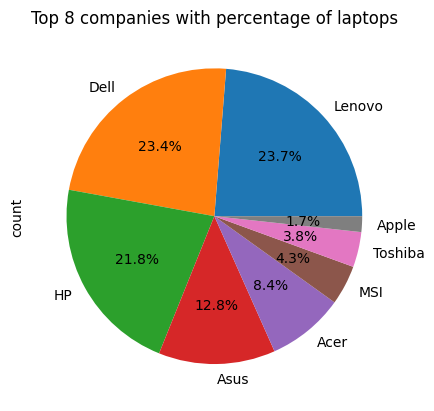

In [25]:
df['Company'].value_counts().head(8).plot(kind='pie',autopct='%0.1f%%',title='Top 8 companies with percentage of laptops')

<Axes: title={'center': 'Type of laptops and their percentage share'}, ylabel='count'>

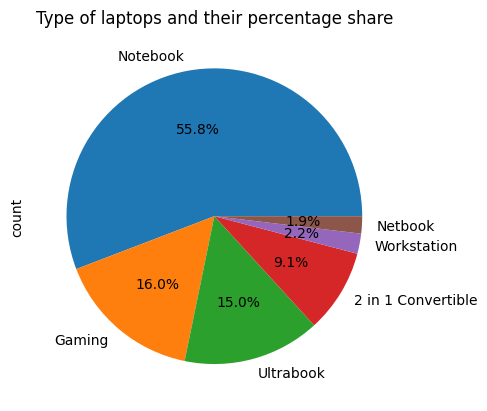

In [26]:
df['TypeName'].value_counts().plot(kind='pie',autopct='%0.1f%%',title='Type of laptops and their percentage share')

In [27]:
df.TypeName.unique()

array(['Ultrabook', 'Notebook', 'Gaming', '2 in 1 Convertible',
       'Workstation', 'Netbook'], dtype=object)